# **Loading Dataset**

In [1]:
import pandas as pd
df=pd.read_csv("/content/anomaly_dataset_preprocessed.csv")

In [2]:
df.head()

,Time,Source,Destination,Protocol,Length
0,2024-03-21 00:30:57.252719,WEB Access PLC Attack,68,HTTP,806
1,2024-03-16 01:57:57.254620,WEB Access PLC Attack,72,STP,904
2,2024-03-20 15:38:57.254635,WEB Access PLC Attack,81,HTTP,638
3,2024-03-19 13:03:57.254642,Stable Normal Operation-Kit Data,99,TELNET,317
4,2024-03-16 12:17:57.254648,Stable Normal Operation-Kit Data,5,DHCPv6,558


# **Data Preprocessing**

In [3]:
# Assuming df is your DataFrame containing the dataset
columns_to_check = ['Source', 'Destination', 'Protocol']
for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")


Unique values in column 'Source': ['WEB Access PLC Attack' 'Stable Normal Operation-Kit Data'
 'TELNET PLC Attack']
Unique values in column 'Destination': [68 72 81 99  5 62 91  7 33 82 38 28 52 79 60 87 96  9 57 30 29 35 59 93
 17 73  8 13 85 76 94 41  1 78 48 51 69 77 58 37 83 95 36 49 50 10 98 71
 31 20 39 45 15 61  4 34 22 40 75 25 65 14  2  3 67 86 27 11 66 84 54 16
 19 43 18 24 21 23 89 53 47 97 56 46 88  6 90 70 26 44 64 63 74 32 92 80
 12 55 42]
Unique values in column 'Protocol': ['HTTP' 'STP' 'TELNET' 'DHCPv6' 'LLMNR' 'PN-PTCP' 'SSDP' 'PN-MRP'
 'BROWSER' 'ARP' 'LLDP' 'HIP' 'NBNS' 'COTP' 'UDP' 'TCP']


In [4]:
# Assuming df is your DataFrame containing the dataset
null_counts = df.isnull().sum()
print("Null counts in each column:")
print(null_counts)


Null counts in each column:
Time           0
Source         0
Destination    0
Protocol       0
Length         0
dtype: int64


In [5]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Apply label encoding to 'Protocol' and 'Source' columns
df['Protocol'] = label_encoder.fit_transform(df['Protocol'])
df['Source'] = label_encoder.fit_transform(df['Source'])

In [6]:
# Check for null values in the DataFrame
null_counts = df.isnull().sum()

# Print the null counts for each column
print("Null counts for each column:")
print(null_counts)


Null counts for each column:
Time           0
Source         0
Destination    0
Protocol       0
Length         0
dtype: int64


# **Exploratory Data Analysis**

In [7]:
df.describe()

,Source,Destination,Protocol,Length
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.990000,50.291000,7.628000,536.384000
std,0.820105,28.726286,4.724822,302.336269
min,0.000000,1.000000,0.000000,1.000000
25%,0.000000,26.000000,3.000000,270.000000
50%,1.000000,50.000000,8.000000,558.000000
75%,2.000000,75.000000,12.000000,815.250000
max,2.000000,99.000000,15.000000,999.000000


In [8]:
import pandas as pd

# Create an empty list to store individual DataFrame for each column
dfs = []

# Populate the list with information for each column
for col in df.columns:
    col_info = pd.DataFrame({
        'Column Name': [col],
        'Data Type': [df[col].dtype],
        'Missing Values': [df[col].isnull().sum()]
    })
    dfs.append(col_info)

# Concatenate all individual DataFrames into a single DataFrame
info_df = pd.concat(dfs, ignore_index=True)

# Display the DataFrame
print(info_df)


   Column Name Data Type  Missing Values
0         Time    object               0
1       Source     int64               0
2  Destination     int64               0
3     Protocol     int64               0
4       Length     int64               0


In [9]:
import plotly.graph_objects as go

# Get the list of numerical column names
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a histogram for each numerical column
for col in num_cols:
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=df[col], histnorm='probability density', name=col,
                               marker=dict(color='skyblue')))
    fig.update_layout(title=f'Distribution of {col}',
                      xaxis=dict(title=col, showgrid=False),
                      yaxis=dict(title='Probability Density', showgrid=False),
                      plot_bgcolor='white',  # Set background color
                      barmode='overlay',  # Overlay bars for better comparison
                      bargap=0.1,  # Set gap between bars
                      bargroupgap=0.1)  # Set gap between groups of bars
    fig.show()


In [10]:
import plotly.graph_objects as go

# Create a box plot for each numerical column
for col in num_cols:
    fig = go.Figure()
    fig.add_trace(go.Box(y=df[col], name=col))
    fig.update_layout(title=f'Boxplot of {col}',
                      xaxis=dict(title=''),
                      yaxis=dict(title=col))
    fig.show()


In [11]:
import plotly.figure_factory as ff

# Calculate correlation matrix
corr_matrix = df.corr()

# Create an annotated heatmap using Plotly
fig = ff.create_annotated_heatmap(z=corr_matrix.values,
                                  x=list(corr_matrix.columns),
                                  y=list(corr_matrix.index),
                                  colorscale='Viridis',
                                  annotation_text=corr_matrix.round(2).values,
                                  showscale=True)

# Update layout
fig.update_layout(title='Correlation Heatmap',
                  xaxis=dict(title='Features'),
                  yaxis=dict(title='Features'))

# Show the interactive heatmap
fig.show()


<ipython-input-11-118ebd755b50>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [12]:
import plotly.graph_objects as go

# Sort DataFrame by 'Time' column
df_sorted = df.sort_values('Time')

# Create an interactive line plot using Plotly
fig = go.Figure()

# Add trace for the line plot
fig.add_trace(go.Scatter(x=df_sorted['Time'], y=df_sorted['Length'],
                         mode='lines+markers', marker=dict(color='blue'), name='Length'))

# Update layout
fig.update_layout(title='Line Plot of Time vs. Length', xaxis_title='Time', yaxis_title='Length',
                  xaxis=dict(type='date', tickformat='%Y-%m-%d %H:%M:%S'), showlegend=True)

# Show the interactive plot
fig.show()


# **Data Preparation**

**Generating Lables Through Unsupervise Approach**

In [13]:
import pandas as pd

# Assuming 'Time' is the name of the column you want to convert to float
df['Time'] = pd.to_datetime(df['Time']).astype(int) / 10**9

# Now the 'Time' column has been converted to float data type

import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns if any
df_numeric = df

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply Isolation Forest
isolation_forest = IsolationForest(contamination=0.375)  # Adjust contamination as needed
isolation_forest.fit(df_scaled)

# Predict outliers
outliers = isolation_forest.predict(df_scaled)

# Convert outliers to binary values (1 for outliers, 0 for non-outliers)
anomalies = [1 if x == -1 else 0 for x in outliers]

# Replace 'Outlier' column with 'Anomaly'
df['Anomaly'] = anomalies

# Print identified anomalies
print("Identified Anomalies:")
print(df[df['Anomaly'] == 1])


Identified Anomalies:
             Time  Source  Destination  Protocol  Length  Anomaly
1    1.710554e+09       2           72        12     904        1
3    1.710853e+09       0           99        14     317        1
4    1.710591e+09       0            5         3     558        1
10   1.711103e+09       0           38         3      30        1
12   1.711012e+09       1           52         0      73        1
..            ...     ...          ...       ...     ...      ...
992  1.711130e+09       1           98         7     734        1
993  1.710990e+09       0           12        14     847        1
994  1.710952e+09       0            6         5     129        1
997  1.711044e+09       0           69         0     885        1
999  1.711097e+09       1           33        11      30        1

[375 rows x 6 columns]


In [14]:
# Define features (X) and target (y)
X = df[['Time', 'Length', 'Source', 'Protocol', 'Destination']]
y = df['Anomaly']

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features (X)
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Print the normalized features
print("Normalized Features (X):")
print(X_scaled_df.head())


Normalized Features (X):
       Time    Length    Source  Protocol  Destination
0  0.822442  0.892221  1.232166 -0.556490     0.616782
1 -1.663392  1.216526  1.232166  0.925789     0.756097
2  0.636520  0.336271  1.232166 -0.556490     1.069556
3  0.079103 -0.725992 -1.207766  1.349297     1.696473
4 -1.446716  0.071532 -1.207766 -0.979998    -1.577428


In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training data shape (X_train):", X_train.shape)
print("Training data shape (y_train):", y_train.shape)
print("Testing data shape (X_test):", X_test.shape)
print("Testing data shape (y_test):", y_test.shape)


Training data shape (X_train): (800, 5)
Training data shape (y_train): (800,)
Testing data shape (X_test): (200, 5)
Testing data shape (y_test): (200,)


# **Applying Isolation Forest**

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
# Define and train the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.3)  # Adjust contamination based on anomaly rate
isolation_forest.fit(X_train)

# Predict anomalies in the testing data
y_pred = isolation_forest.predict(X_test)

# Convert predictions to binary labels (1 for normal, -1 for anomaly)
y_pred_binary = np.where(y_pred == 1, 0, 1)  # 0 for normal, 1 for anomaly

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Calculate true positives, true negatives, false positives, and false negatives
tn, fp, fn, tp = conf_matrix.ravel()


# **Model Metrices**

In [18]:
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print true positives, true negatives, false positives, and false negatives
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)


Accuracy: 0.905
Precision: 0.8985507246376812
Recall: 0.8378378378378378
F1 Score: 0.8671328671328672
True Positives: 62
True Negatives: 119
False Positives: 7
False Negatives: 12


# **Confusion Matrix**

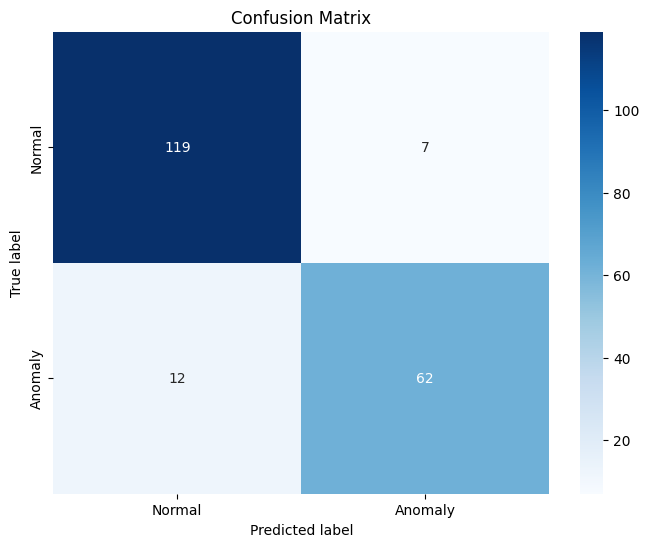

In [19]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# **'Accuracy', 'Precision', 'Recall', 'F1 Score' Graph**

<ipython-input-20-12a7b1da7321>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




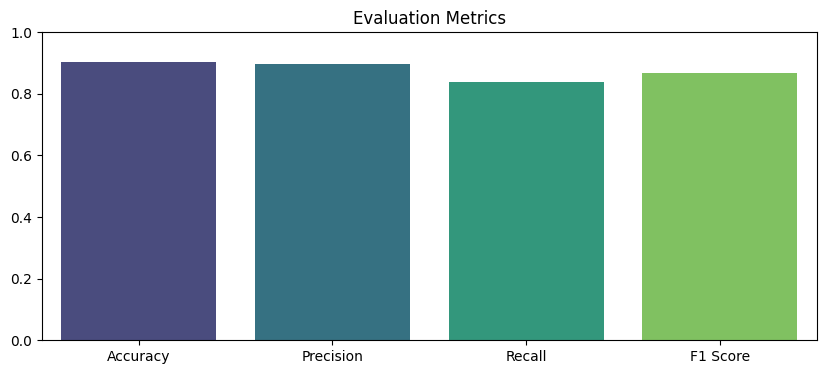

In [20]:
# Plot evaluation metrics
plt.figure(figsize=(10, 4))
metrics = [accuracy, precision, recall, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
sns.barplot(x=labels, y=metrics, palette='viridis')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)  # Setting y-axis limit to [0, 1] for better visualization
plt.show()
